# Proyecto: Procesamiento de Datos con Python
**Equipo 18**

- Ana Cristina Castillo Escobar
- Edgar Balderas Loranca
- José Alberto Cortes Ayala
- Leandro Marcelo Pantoja Acosta
- Luis Arturo Rosas León
- Marcos Yáñez Espíndola
---



## **Identificación del problema**

La inseguridad es una de las principales preocupaciones públicas de la sociedad. Existe una creciente ansiedad colectiva ocasionada por el incremento de la violencia y la criminalidad en grandes centros urbanos como lo es la Ciudad de México (CDMX). De acuerdo con cifras oficiales del INEGI, en la capital del país ha crecido la tasa de incidencia delictiva por cada cien mil habitantes de 44,055 en 2010 a 62,008 en 2019; lo cual posiciona a la CDMX como la entidad con el mayor número crímenes en todo el país (INEGI, 2019). 

Este problema ha llegado a un nivel tan preocupante que, en el 2018, 86 de cada 100 personas residentes de la Ciudad de México afirman sentirse víctimas potenciales de un delito, además de que 77.2% de la población capitalina considera la inseguridad como uno de los tres problemas más inquietantes (Gobierno de la CDMX, 2020). 

Debido a los argumentos expuestos con anterioridad, se estableció que el objetivo principal de este proyecto es la elaboración de indicadores estadísticos y representaciones gráficas que nos ayuden a enteder como se comportan los índices de inseguridad en la CDMX, esto con el fin de ilustrar al público en general en cuanto a los diversos factores que están relacionados con los sucesos de inseguridad en la ciudad; al igual que se pretende explorar y hallar posibles causas y/o características que influyen en el comportamiento de los índices de inseguridad por zonas demográficas en la ciudad.

Esta primera parte del proyecto está enfocada en la recolección, exploración, limpieza y procesamiento inicial de los conjuntos de datos que se utilizarán para posteriormente cumplir con el objetivo principal de esta investigación.

**Referencias**

INEGI. (2019). *Incidencia delictiva*. 09 agosto, 2021. https://www.inegi.org.mx/temas/incidencia/

Gobierno de la Ciudad de México. (2020). *Un diagnóstico de la desigualdad socio territorial*. 09 agosto, 2021. https://www.evalua.cdmx.gob.mx/storage/app/media/DIES20/8-cap-7-inseguridad-y-violencia-publicas.pdf

Pansters, W., Castillo, H. (2007). *Violencia e Inseguridad en la Ciudad De México: Entre la Fragmentación y la Politización*. Foro Internacional. pp. 577-615

---



## **Planteamiento de preguntas**

Preguntas de investigación relacionadas con el problema de inseguridad y violencia en la CDMX:




1. ¿En qué alcaldía se comete el mayor número de delitos?
2. ¿Existe correlación entre el numero de delitos realizados promedio por zona y la percepcion de seguridad de la gente?
---

## **Recolección de datos**

Para este proyecto se utilizó el portal de datos abiertos del Gobierno de la Ciudad de México y el sitio web del INEGI. Dentro de la primera de estas se encuentra una base de datos que contiene la información de las víctimas de los delitos en las carpetas de investigación de la Procuraduría General de Justicia (PGJ) de la Ciudad de México. Por otro lado, en la página de internet del INEGI se encuentran los datos de la Encuesta Nacional de Seguridad Pública Urbana (ENSU) y los resultados del Censo Población y Vivienda 2020.

**Links para la descarga de los datos**

Víctimas en las Carpetas de Investigación: https://datos.cdmx.gob.mx/dataset/victimas-en-carpetas-de-investigacion-fgj/resource/d543a7b1-f8cb-439f-8a5c-e56c5479eeb5

ENSU: https://www.inegi.org.mx/programas/ensu/#Datos_abiertos

Censo Población y Vivienda 2020: https://www.inegi.org.mx/programas/ccpv/2020/default.html#Resultados_generales 

El dataset de Víctimas en las Carpetas de Investigación será el principal conjunto de datos a usar en el proyecto, mientras que los otros dos se usarán para generar un CSV que contenga los siguientes datos para cada alcaldía:

- Población	
- Población económicamente inactiva	
- Grado promedio	
- Número de delitos	
- Percepción de la inseguridad	
  - Mejorará	
  - Seguira igual de bien	
  - Seguira igual de mal	
  - Empeorará


La lectura de los datos de Víctimas en las Carpetas de Investigación se hará usando la API que proporciona el Portal de Datos Abiertos de la CDMX

In [ ]:
# Lectura de datos almacenados localmente
# datos_delitos = pd.read_csv('/content/drive/MyDrive/Proyecto/Data/victimas_completa_junio_2021.csv', low_memory=False)

In [ ]:
# Lectura de datos desde la API
import requests
import pandas as pd
import time

In [ ]:
# La primera petición debe llevar un payload
base = 'https://datos.cdmx.gob.mx'
start = '/api/3/action/datastore_search?resource_id=d543a7b1-f8cb-439f-8a5c-e56c5479eeb5'
payload = {'limit' : 10000, 'offset' : 0}
endpoint = base + start
r = requests.get(endpoint, params = payload)

In [ ]:
# Iniciamos valores para la automatización
result = r.json()['result']
endpoint = base + result['_links']['next']
json_delitos = {}
json_delitos[0] = result['records']

In [ ]:
# Iniciamos las peticiones
total = result['total']
i = 1

while result['offset'] + 10_000 <= total:
    try:
        r = requests.get(endpoint)
        time.sleep(3)

        if r.status_code == 200:
            result = r.json()['result']
            json_delitos[i] = result['records']

            next = result['_links']['next']
            endpoint = base + next
            i = i + 1
    except:
        continue

In [ ]:
# Comprobamos que el total de llamadas hayan sido las que esperábamos (60)
len(json_delitos)

60

In [ ]:
datos_delitos = []

# El json no requiere normalización
for key in json_delitos:
    df = pd.DataFrame(json_delitos[key])
    datos_delitos.append(df)

datos_delitos = pd.concat(datos_delitos, axis = 0).reset_index(drop = True).replace("NA", np.nan)

In [ ]:
import glob
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Para los datos del Censo de Población y Vivienda 2020 únicamente son de interés los datos a nivel alcaldúa de la CDMX. Las columnas que relevantes son:

- La población total
- La población económicamente inactiva 
- El grado de escolaridad promedio

Desde este punto sólo tomamos la parte de los datos que cumplen con estas especificaciones.

In [ ]:
datos_censo = pd.read_csv('/content/drive/MyDrive/Proyecto/Data/conjunto_de_datos_iter_09CSV20.csv', low_memory=False)
datos_censo = datos_censo[datos_censo['NOM_LOC']=='Total del Municipio']
datos_censo=datos_censo[['NOM_MUN','POBTOT','PE_INAC','GRAPROES']]

Para la lectura de los datos de la ENSU, se descargí cada uno de los CSV correspondientes a cada trimestre a partir del 2017, se renombraron manualmente por fecha y con el siguiente fragmento de código se cargó cada CSV, tomando únicamente los datos correspondientes a la CDMX y las columnas de las preguntas 1 y 3 de esta encuesta. Dichas preguntas son:

1. ¿Usted considera segura la ciudad?

  - 1: Si
  - 2: No
  
3. ¿Cuál es su expectativa respecto a las condiciones de seguridad pública en los próximos años?

  - 1: Mejorará
  - 2: Seguirá igual de bien
  - 3: Seguirá igual de mal
  - 4: Empeorará

  Posteriormente, se concatenó la información obtenida de cada CSV correspondiente a cada trimestre en un solo DataFrame.

In [ ]:
path = r''
all_files = sorted(glob.glob(path + "/content/drive/MyDrive/Proyecto/Data/ENSU/*.csv"))

In [ ]:
li = []
for filename in all_files:
    df = pd.read_csv(filename,low_memory=False)
    df=df[(df['NOM_ENT']=='Ciudad de Mexico\r') | (df['NOM_ENT']=='Ciudad de México\r')].loc[:,['NOM_MUN','BP1_1','BP1_3']]
    df['Fecha']=f'{filename[-11:-7]}-{filename[-6:-4]}-01'
    li.append(df)
datos_ensu = pd.concat(li, axis=0, ignore_index=True)

---

## **Análisis exploratorio del conjunto de datos**


Para el analisis exploratorio se obtuvó el número de nulos por columna, el tipo de dato, los nombres de las columnas y visualizaremos como se ven los datos, también se hicieron algunas graficas que permiten conocer mejor los datos.

#### Víctimas en las Carpetas de Investigación

In [ ]:
datos_delitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598402 entries, 0 to 598401
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   _id              598402 non-null  int64 
 1   idCarpeta        598402 non-null  int64 
 2   Ano_inicio       598402 non-null  int64 
 3   Mes_inicio       598402 non-null  object
 4   FechaInicio      598402 non-null  object
 5   Delito           598402 non-null  object
 6   Categoria        598402 non-null  object
 7   Sexo             477773 non-null  object
 8   Edad             376086 non-null  object
 9   TipoPersona      593139 non-null  object
 10  CalidadJuridica  598400 non-null  object
 11  competencia      598402 non-null  object
 12  Ano_hecho        598068 non-null  object
 13  Mes_hecho        598068 non-null  object
 14  FechaHecho       598068 non-null  object
 15  HoraHecho        598071 non-null  object
 16  HoraInicio       598400 non-null  object
 17  AlcaldiaHe

Se observa que ciertas columnas no corresponden con el tipo de dato que se espera, por ejemplo las fechas.

In [ ]:
datos_delitos.isna().sum()

_id                     0
idCarpeta               0
Ano_inicio              0
Mes_inicio              0
FechaInicio             0
Delito                  0
Categoria               0
Sexo               120629
Edad               222316
TipoPersona          5263
CalidadJuridica         2
competencia             0
Ano_hecho             334
Mes_hecho             334
FechaHecho            334
HoraHecho             331
HoraInicio              2
AlcaldiaHechos        379
ColoniaHechos       24400
Calle_hechos         1122
Calle_hechos2      381279
latitud             24165
longitud            24169
dtype: int64

También se observó que el DataSet tiene muchos datos nulos.

In [ ]:
datos_delitos.head()

,_id,idCarpeta,Ano_inicio,Mes_inicio,FechaInicio,Delito,Categoria,Sexo,Edad,TipoPersona,CalidadJuridica,competencia,Ano_hecho,Mes_hecho,FechaHecho,HoraHecho,HoraInicio,AlcaldiaHechos,ColoniaHechos,Calle_hechos,Calle_hechos2,latitud,longitud
0,591708,8956142,2021,Junio,2021-06-21T00:00:00,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...,DELITO DE BAJO IMPACTO,Masculino,54,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2021,Junio,21/06/2021,13:15:00,19:46:00,GUSTAVO A MADERO,TEPEYAC INSURGENTES,GARRIDO,NaN,19.4834799460976,-99.1200283199751
1,591709,8956143,2021,Junio,2021-06-21T00:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,Femenino,35,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2021,Junio,21/06/2021,04:00:00,19:48:00,MIGUEL HIDALGO,ANAHUAC,LAGO ZIRAHUEN,2a. CDA. LAGO ZIRAHUEN,19.4448680069252,-99.1729071700792
2,591710,8956144,2021,Junio,2021-06-21T00:00:00,ABUSO SEXUAL,DELITO DE BAJO IMPACTO,Femenino,10,FISICA,VICTIMA,FUERO COMUN,2020,Enero,01/01/2020,11:00:00,19:48:00,XOCHIMILCO,LOMAS DE NATIVITAS,LAS FLORES,NaN,19.2432760061051,-99.0895155103917
3,591711,8956145,2021,Junio,2021-06-21T00:00:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR,DELITO DE BAJO IMPACTO,Femenino,37,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,2021,Junio,20/06/2021,23:30:00,19:49:00,CUAJIMALPA DE MORELOS,CUAJIMALPA,AVENIDA VERACRUZ,ESQUINA CON CALLE JOSE MARIA CASTORENA,19.3534741784942,-99.3006026700988
4,591712,8956146,2021,Junio,2021-06-21T00:00:00,ROBO A REPARTIDOR SIN VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,NaN,NaN,MORAL,OFENDIDO,FUERO COMUN,2021,Junio,21/06/2021,14:30:00,19:54:00,IZTACALCO,NaN,SE DESCONOCE EL LUGAR EXACTO DEL ROBO,SE DESCONOCE EL LUGAR EXACTO DEL ROBO,NaN,NaN


Se observó que algunos de los valores están escritos totalmente en mayúscula, cuando lo ideal es tenerlos estilo "title" para mejorar la visualización.

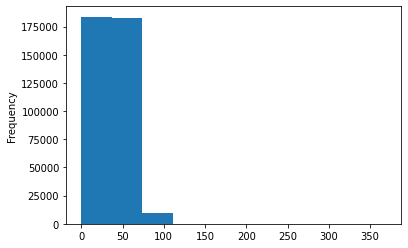

In [ ]:
datos_delitos['Edad'].astype(float).plot.hist()
plt.show()

Se puede apreciar que además de los datos nulos, existen "outliers" en el campo de la Edad, en este caso se tiene que algunos sujetos tienen una edad cercana a 350 años.

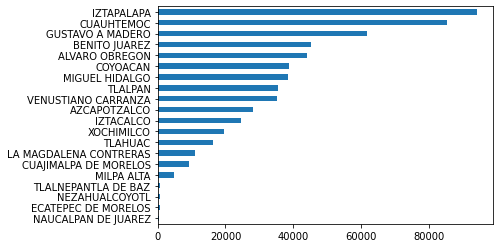

In [ ]:
datos_delitos['AlcaldiaHechos'].value_counts().head(20).sort_values(ascending=True).plot.barh()
plt.show()

Es notable que además de las alcaldías de la CDMX, tambien hay otros municipios de otros estados, principalemnte el Edo. Mex. Por lo que también se tuvo que eliminar estas observaciones, ya que nuestro análisis se centró unicamente en la CDMX.

#### Censo Población y Vivienda 2020

In [ ]:
datos_censo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 3 to 664
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   NOM_MUN   16 non-null     object
 1   POBTOT    16 non-null     int64 
 2   PE_INAC   16 non-null     object
 3   GRAPROES  16 non-null     object
dtypes: int64(1), object(3)
memory usage: 640.0+ bytes


Se observó que algunas de las columnas no corresponden con el tipo de dato esperado, PE_INAC debe ser int y GRAPROES debe ser float.

In [ ]:
datos_censo.isna().sum()

NOM_MUN     0
POBTOT      0
PE_INAC     0
GRAPROES    0
dtype: int64

Además no hay ningún dato faltante o NaN.

In [ ]:
datos_censo.head()

,NOM_MUN,POBTOT,PE_INAC,GRAPROES
3,Azcapotzalco,432205,137554,11.91
5,Coyoacán,614447,202374,12.51
7,Cuajimalpa de Morelos,217686,61443,11.44
34,Gustavo A. Madero,1173351,387814,11.11
36,Iztacalco,404695,125126,11.52


También es recalcable que los nombres de las alcaldías no corresponden al 100% con el dataset anterior ni con el de la ENSU, ya que varían en pequeñas cosas, como los acentos o las mayúsculas.

In [ ]:
datos_ensu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33755 entries, 0 to 33754
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   NOM_MUN  33755 non-null  object
 1   BP1_1    33755 non-null  int64 
 2   BP1_3    33755 non-null  int64 
 3   Fecha    33755 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.0+ MB


Se observó que la fecha no coincide con el formato de fecha.

In [ ]:
datos_ensu.isna().sum()

NOM_MUN    0
BP1_1      0
BP1_3      0
Fecha      0
dtype: int64

No existen valores faltantes o NaN.

In [ ]:
datos_ensu.head()

,NOM_MUN,BP1_1,BP1_3,Fecha
0,Azcapotzalco\r,2,4,2017-03-01
1,Azcapotzalco\r,2,4,2017-03-01
2,Azcapotzalco\r,2,4,2017-03-01
3,Azcapotzalco\r,1,2,2017-03-01
4,Azcapotzalco\r,2,4,2017-03-01


Se ve que la columna de municipio tiene un "/r" en algunos de los registros, los cuales deben ser eliminados.

---

## **Limpieza del data frame**


#### Víctimas en las Carpetas de Investigación

Se tomarón unicamente aquellos registros que pertenecen a la CDMX, en donde la víctima es una persona física, y donde la edad es menor o igual 120 años.

In [ ]:
alcaldias = ['ALVARO OBREGON', 'AZCAPOTZALCO', 'COYOACAN', 'IZTACALCO',
       'IZTAPALAPA', 'GUSTAVO A MADERO', 'VENUSTIANO CARRANZA',
       'XOCHIMILCO', 'MIGUEL HIDALGO', 'CUAUHTEMOC', 'BENITO JUAREZ',
       'TLAHUAC', 'TLALPAN', 'LA MAGDALENA CONTRERAS','CUAJIMALPA DE MORELOS', 'MILPA ALTA']
datos_delitos = datos_delitos.loc[(datos_delitos['AlcaldiaHechos'].isin(alcaldias)) & (datos_delitos['TipoPersona']=='FISICA') & (datos_delitos['Edad'].astype(float)<=120)]

Como ahora se está seguro de que todas son personas físicas, se puede eliminar esta columna y la del _id, ya que tenemos el id de la carpeta de investigación.

In [ ]:
datos_delitos.drop(columns=['TipoPersona','_id'], inplace=True)

Se cambió todas las ocurrencias de 'GUSTAVO A MADERO' a 'GUSTAVO A. MADERO', ya que de esta forma está en los otros dos DataFrames.

In [ ]:
datos_delitos['AlcaldiaHechos'].replace('GUSTAVO A MADERO','GUSTAVO A. MADERO',inplace=True)

Se pasaron a formato "title" (mayúsculas en la primera letra de cada palabra) todas las columnas que son "String".

In [ ]:
columnas_str = ['Delito','Categoria','CalidadJuridica','competencia','AlcaldiaHechos','ColoniaHechos','Calle_hechos','Calle_hechos2']
datos_delitos[columnas_str] = datos_delitos[columnas_str].apply(lambda x: x.str.title())

Se eliminaron todos aquellos registros que tengan NaN en una columna que no sea la CalleHechos_2, ya que ésta es un campo opcional.

Además se reemplazaron los NaN de la columna CalleHechos_2 por un 'No aplica'.

In [ ]:
datos_delitos.dropna(subset=datos_delitos.columns.drop("Calle_hechos2"), inplace=True)
datos_delitos["Calle_hechos2"] = datos_delitos["Calle_hechos2"].replace(np.nan,'No aplica')

Se dió el tipo de dato correcto a las columnas que tenían un tipo de dato incorrecto.

In [ ]:
datos_delitos = datos_delitos.astype({"Ano_hecho":"int","Edad":"int"})
datos_delitos["FechaInicio"] = pd.to_datetime(datos_delitos['FechaInicio'],dayfirst=True)
datos_delitos["FechaHecho"] = pd.to_datetime(datos_delitos['FechaHecho'],dayfirst=True)

Se hace que el índice sea el id de la carpeta de investigación.

In [ ]:
datos_delitos = datos_delitos.set_index("idCarpeta")

Se cambiaron los nombres de las columnas por unos más descriptivos y visualmente agradables.

In [ ]:
datos_delitos.columns = ['Año de denuncia','Mes de denuncia','Fecha de denuncia','Delito','Categoria', 'Sexo', 'Edad',
                         'Calidad Juridica', 'Competencia', 'Año de los hechos', 'Mes de los hechos', 'Fecha de los hechos','Hora de los hechos',
                         'Hora de denuncia','Alcaldia', 'Colina', 'Calle','Calle 2', 'Latitud', 'Longitud']

Se creó una función que elimina todos los acentos reemplazandolos por letras normales y que además eliminan los "/r" que se habían identificado. Esta función se la aplicamos a la columna de Alcaldía.

In [ ]:
def normalize(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper()).replace('\r', '')
    return s
datos_delitos['Alcaldia'] = datos_delitos['Alcaldia'].apply(normalize)

Este es el resultado final de este Data Frame.

In [ ]:
datos_delitos.head()

,Año de denuncia,Mes de denuncia,Fecha de denuncia,Delito,Categoria,Sexo,Edad,Calidad Juridica,Competencia,Año de los hechos,Mes de los hechos,Fecha de los hechos,Hora de los hechos,Hora de denuncia,Alcaldia,Colina,Calle,Calle 2,Latitud,Longitud
idCarpeta,,,,,,,,,,,,,,,,,,,,
8956142,2021,Junio,2021-06-21,Daño En Propiedad Ajena Culposa Por Tránsito V...,Delito De Bajo Impacto,Masculino,54,Victima Y Denunciante,Fuero Comun,2021,Junio,2021-06-21,13:15:00,19:46:00,Gustavo A. Madero,Tepeyac Insurgentes,Garrido,No aplica,19.4834799460976,-99.1200283199751
8956143,2021,Junio,2021-06-21,Violencia Familiar,Delito De Bajo Impacto,Femenino,35,Victima Y Denunciante,Fuero Comun,2021,Junio,2021-06-21,04:00:00,19:48:00,Miguel Hidalgo,Anahuac,Lago Zirahuen,2A. Cda. Lago Zirahuen,19.4448680069252,-99.1729071700792
8956144,2021,Junio,2021-06-21,Abuso Sexual,Delito De Bajo Impacto,Femenino,10,Victima,Fuero Comun,2020,Enero,2020-01-01,11:00:00,19:48:00,Xochimilco,Lomas De Nativitas,Las Flores,No aplica,19.2432760061051,-99.0895155103917
8956145,2021,Junio,2021-06-21,Lesiones Culposas Por Transito Vehicular,Delito De Bajo Impacto,Femenino,37,Victima Y Denunciante,Fuero Comun,2021,Junio,2021-06-20,23:30:00,19:49:00,Cuajimalpa De Morelos,Cuajimalpa,Avenida Veracruz,Esquina Con Calle Jose Maria Castorena,19.3534741784942,-99.3006026700988
8956147,2021,Junio,2021-06-21,Violencia Familiar,Delito De Bajo Impacto,Femenino,48,Victima Y Denunciante,Fuero Comun,2021,Junio,2021-06-21,10:30:00,19:54:00,Iztapalapa,San Lucas,Los Reyes,Ermita Iztapalapa,19.3563589238188,-99.1004477397269


Este será el principal Data Frame con el que continuaremos trabajando en los siguientes modulos de BEDU, por lo que lo se exportó y se guardó como un archivo CSV.

In [ ]:
datos_delitos.to_csv('datos_delitos.csv')

#### ENSU

Se pasó el nombre de la Alcaldía a formato title y le aplicamos la función que elimina acentos y el texto "/r".

In [ ]:
datos_ensu['NOM_MUN']=datos_ensu['NOM_MUN'].str.title().apply(normalize)

Se renombrarón las columnas y se eligierón unos títulos más descriptivos y agradables visualmente.

In [ ]:
datos_ensu.columns = ['Alcaldia','Pregunta 1','Pregunta 3','Fecha']

Se transformó a formato de fecha la columna de Fecha.

In [ ]:
datos_ensu['Fecha'] = pd.to_datetime(datos_ensu['Fecha'])

Se hizo un doble índice con las columnas Alcaldía y Fecha.

In [ ]:
datos_ensu=datos_ensu.set_index(['Alcaldia','Fecha'])

#### Censo Población y Vivienda 2020

Se cambió el nombre de las Alcaldías a formato "title" y se aplicó la función elimina acentos y el texto "/r".

In [ ]:
datos_censo['NOM_MUN'] = datos_censo['NOM_MUN'].str.title().apply(normalize)

Se renombraron las columnas por unas más descriptivas y agradables visualmente.

In [ ]:
datos_censo.columns = ['Alcaldia', 'Poblacion','Poblacion economicamente inactiva','Grado promedio']

Se estableció la columna Alcaldía como índice.

In [ ]:
datos_censo = datos_censo.set_index("Alcaldia")

Se transformaron a tipo numérico todas las columnas que lo requerían.

In [ ]:
for columna in datos_censo.columns:
  datos_censo[columna] = pd.to_numeric(datos_censo[columna])

---

## **Procesamiento de datos**

Se creó una serie que contiene el número de delitos que se registraron por Alcaldía.

In [ ]:
delitos_por_alcaldia = datos_delitos.groupby('Alcaldia').size()

Se crearon columnas dummies para los valores de la Pregunta 3.

In [ ]:
datos_ensu = pd.get_dummies(datos_ensu, columns=['Pregunta 3'])

Se hicieron que todos los 9 sean igual a  NaN coN np.nan, ya que éste es el valor cuando no se responde esa pregunta. De esta forma esos valores no iterfieren al hacer promedios y sumas.

In [ ]:
datos_ensu=datos_ensu.replace(9,np.nan)

Se restó 1 a toda la columna de la Pregunta 1.

In [ ]:
datos_ensu['Pregunta 1']=datos_ensu['Pregunta 1']-1

Se agrupó por alcaldia y se calculó el numero de personas que votaron por cada opción de la pregunta 3.

In [ ]:
pregunta3_alcaldia = datos_ensu[['Pregunta 3_1','Pregunta 3_2','Pregunta 3_3','Pregunta 3_4']].groupby(level='Alcaldia').sum()
pregunta3_alcaldia.columns=['Mejorara','Seguira igual de bien','Seguira igual de mal','Empeorara']
pregunta3_alcaldia['total']=pregunta3_alcaldia.sum(axis=1)

Se pasó el resultado a porcentaje, ya que el número de personas que respondió la encuesta por alcaldía es diferente.

In [ ]:
for i in pregunta3_alcaldia.columns:
    pregunta3_alcaldia[i]=pregunta3_alcaldia[i]/pregunta3_alcaldia['total']

Se obtuvo el promedio por alcaldía para la pregunta 1.

In [ ]:
pregunta1_alcaldia = datos_ensu[['Pregunta 1']].groupby('Alcaldia').mean()
pregunta1_alcaldia.columns=['Percepcion Inseguridad']

Se concatenron los Data Frames de cada una de las preguntas en uno solo para obtener los resultados de las preguntas 1 y 3 por alcaldía.

In [ ]:
ensu_por_alcaldia = pd.merge(pregunta1_alcaldia,pregunta3_alcaldia.iloc[:,:4], left_index=True, right_index=True)
ensu_por_alcaldia

,Percepcion Inseguridad,Mejorara,Seguira igual de bien,Seguira igual de mal,Empeorara
Alcaldia,,,,,
Alvaro Obregon,0.832045,0.189423,0.064153,0.365843,0.380581
Azcapotzalco,0.797304,0.275499,0.073081,0.338065,0.313354
Benito Juarez,0.570858,0.213353,0.179217,0.296185,0.311245
Coyoacan,0.711749,0.227019,0.116992,0.324977,0.331012
Cuajimalpa De Morelos,0.471257,0.306318,0.234844,0.238034,0.220804
Cuauhtemoc,0.760204,0.217065,0.104548,0.374121,0.304266
Gustavo A. Madero,0.850827,0.209231,0.043761,0.383932,0.363077
Iztacalco,0.827869,0.209568,0.074363,0.396776,0.319293
Iztapalapa,0.894839,0.252361,0.037773,0.355585,0.354282


Se hizo algo muy parecido pero agrupando por fecha.

In [ ]:
pregunta3_fecha = datos_ensu[['Pregunta 3_1','Pregunta 3_2','Pregunta 3_3','Pregunta 3_4']].groupby(level='Fecha').sum()
pregunta3_fecha.columns=['Mejorara','Seguira igual de bien','Seguira igual de mal','Empeorara']
pregunta3_fecha['total']=pregunta3_fecha.sum(axis=1)

In [ ]:
for i in pregunta3_fecha.columns:
    pregunta3_fecha[i]=pregunta3_fecha[i]/pregunta3_fecha['total']

In [ ]:
pregunta1_fecha = datos_ensu[['Pregunta 1']].groupby('Fecha').mean()
pregunta1_fecha.columns=['Percepcion Inseguridad']

In [ ]:
ensu_por_fecha = pd.merge(pregunta1_fecha,pregunta3_fecha.iloc[:,:4], left_index=True, right_index=True)
ensu_por_fecha

,Percepcion Inseguridad,Mejorara,Seguira igual de bien,Seguira igual de mal,Empeorara
Fecha,,,,,
2017-03-01,0.884821,0.097583,0.060877,0.412713,0.428827
2017-06-01,0.856109,0.094118,0.039819,0.409955,0.456109
2017-09-01,0.907540,0.064195,0.035262,0.418626,0.481917
2017-12-01,0.907856,0.093567,0.028265,0.399610,0.478558
2018-03-01,0.921381,0.085686,0.037975,0.401168,0.475170
2018-06-01,0.909599,0.162289,0.019700,0.378049,0.439962
2018-09-01,0.779190,0.331645,0.074913,0.353239,0.240203
2018-12-01,0.820937,0.481928,0.050046,0.306766,0.161260
2019-06-01,0.842441,0.287684,0.052390,0.344669,0.315257


Finalmente, se concatenó el DataFrame que habiamos obtenido del censo con la serie que nos muestra el numero de delitos por alcaldía y con el resumen obtenido de las preguntas 1 y 3 de la ENSU por alcaldía.

In [ ]:
resumen_alcaldia = pd.concat([datos_censo,pd.Series(delitos_por_alcaldia, name="Numero de Delitos"),ensu_por_alcaldia],axis=1)

In [ ]:
resumen_alcaldia

,Poblacion,Poblacion economicamente inactiva,Grado promedio,Numero de Delitos,Percepcion Inseguridad,Mejorara,Seguira igual de bien,Seguira igual de mal,Empeorara
Azcapotzalco,432205,137554,11.91,17444,0.797304,0.275499,0.073081,0.338065,0.313354
Coyoacan,614447,202374,12.51,24531,0.711749,0.227019,0.116992,0.324977,0.331012
Cuajimalpa De Morelos,217686,61443,11.44,4697,0.471257,0.306318,0.234844,0.238034,0.220804
Gustavo A. Madero,1173351,387814,11.11,37965,0.850827,0.209231,0.043761,0.383932,0.363077
Iztacalco,404695,125126,11.52,15699,0.827869,0.209568,0.074363,0.396776,0.319293
Iztapalapa,1835486,563273,10.42,54402,0.894839,0.252361,0.037773,0.355585,0.354282
La Magdalena Contreras,247622,77368,10.84,7922,0.743764,0.241339,0.090069,0.310046,0.358545
Milpa Alta,152685,40847,9.95,3330,0.637544,0.205794,0.150875,0.327097,0.316234
Alvaro Obregon,759137,228035,11.28,25001,0.832045,0.189423,0.064153,0.365843,0.380581
Tlahuac,392313,119860,10.53,10995,0.819194,0.228587,0.086724,0.357066,0.327623


Éste es el segundo Data Frame con el que trabajaremos para resolver las preguntas planteadas al inicio por lo que lo exportamos.

In [ ]:
resumen_alcaldia.to_csv('resumen_alcaldia.csv')

Finalmente, usando los 2 DataFrames que se generaron, se resuelven algunas de las preguntas.

1. ¿En qué alcaldía se comete el mayor número de delitos?

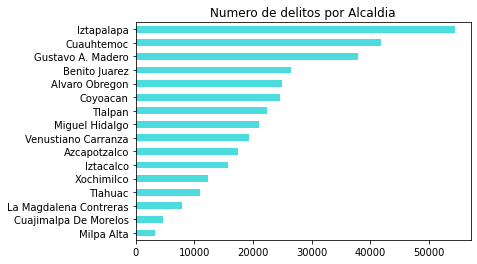

In [ ]:
datos_delitos['Alcaldia'].value_counts().sort_values(ascending=True).plot.barh(alpha = 0.7, color='#00CED1')
plt.title('Numero de delitos por Alcaldia')
plt.show()

Se observa que la alcaldía con más delitos denunciados es Iztapalapa.

2. ¿Existe correlación entre el numero de delitos cometidos promedio por zona y la percepcion de seguridad de la gente?

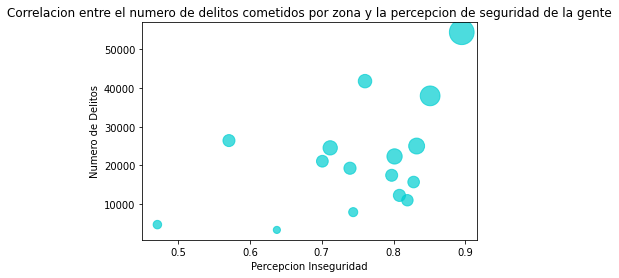

In [ ]:
resumen_alcaldia.plot.scatter(x ='Percepcion Inseguridad',y ='Numero de Delitos',s=resumen_alcaldia['Poblacion']/3000, alpha = 0.7, c='#00CED1')
plt.title('Correlacion entre el numero de delitos cometidos por zona y la percepcion de seguridad de la gente')
plt.show()

In [ ]:
resumen_alcaldia.corr()

,Poblacion,Poblacion economicamente inactiva,Grado promedio,Numero de Delitos,Percepcion Inseguridad,Mejorara,Seguira igual de bien,Seguira igual de mal,Empeorara
Poblacion,1.000000,0.996226,-0.171350,0.863717,0.590521,-0.108432,-0.581700,0.374766,0.462877
Poblacion economicamente inactiva,0.996226,1.000000,-0.201913,0.835432,0.606051,-0.102348,-0.604551,0.379844,0.482747
Grado promedio,-0.171350,-0.201913,1.000000,0.194287,-0.400270,-0.051070,0.427104,-0.217219,-0.299755
Numero de Delitos,0.863717,0.835432,0.194287,1.000000,0.476656,-0.193966,-0.445117,0.410411,0.316720
Percepcion Inseguridad,0.590521,0.606051,-0.400270,0.476656,1.000000,-0.382522,-0.976581,0.846647,0.715034
Mejorara,-0.108432,-0.102348,-0.051070,-0.193966,-0.382522,1.000000,0.378378,-0.581091,-0.658242
Seguira igual de bien,-0.581700,-0.604551,0.427104,-0.445117,-0.976581,0.378378,1.000000,-0.808037,-0.779044
Seguira igual de mal,0.374766,0.379844,-0.217219,0.410411,0.846647,-0.581091,-0.808037,1.000000,0.497746
Empeorara,0.462877,0.482747,-0.299755,0.316720,0.715034,-0.658242,-0.779044,0.497746,1.000000


Se observa que no existe una correlación demasiado grande (0.476656), sin embargo, sí existe cierta relación, lo cual era de esperarse.

---

## **Planes a futuro**

En un futuro esperamos resolver mas preguntas como las siguientes:
1. ¿Cuáles son los 5 delitos con más recurrencia?
1. ¿Cómo se distribuyen las edades de las víctimas?
2. ¿Cómo se dristubuyen el sexo de las víctimas de delitos en la CDMX?
3. ¿En qué mes/meses se cometen más delitos?
4. ¿En qué horarios se cometen más delitos?
5. ¿Hacía que género se concentran los 10 delitos con más ocurrencia (cada uno)?
6. ¿Cómo ha evolucionado por meses la percepción de la seguridad de la gente?
7. ¿Existe correlación entre el nivel de educación promedio por zona y el número de delitos realizados por zona?

También esperamos entrenar un modelo que permita saber el número aproximado de delitos que se cometerán en una colonia y hora en específico, esto puede ser útil para aumentar la vigilancia en ciertas zonas y horas, además podría ser útil para crear una aplicación para que los usuarios sepan si corren peligro al estar en una zona a cierta hora.

---